# Crude Approximation to Orbit of 2 Pallas

## Coordinate notation
---
$x,y,z$ = heliocentric plane of orbit

\begin{align*}
x &= r \cos v \\
y &= r \sin v \\
z &= 0 \\
\end{align*}

where $r$ = heliocentric distance
& $v$ = true anomaly

---

$X,Y,Z$ = heliocentric ecliptic

\begin{align*}
X &= r \cos \beta \cos \lambda \\
Y &= r \cos \beta \sin \lambda \\
Z &= r \sin \beta \\
\end{align*}

where $\beta$ = ecliptic latitude,
$\lambda$ = ecliptic longitude

---

$\xi, \eta, \zeta$ = heliocentric equatorial coordinates

$\mathfrak{x},\mathfrak{y},\mathfrak{z}$ = geocentric equatorial coordinates

\begin{align*}
\mathfrak{x} &= \Delta \cos \delta \cos \alpha \\
\mathfrak{y} &= \Delta \cos \delta \sin \alpha \\
\mathfrak{z} &= \Delta \sin \delta \\
\end{align*}

where $\Delta$ = geocentric distance,
$\delta$ = declination, $\alpha$ = right ascension

---

\begin{align*}
\mathfrak{x} &= \Delta\, \cos \delta\, \cos \alpha = l \Delta = \mathfrak{x}_0 + \xi \\
\mathfrak{y} &= \Delta\, \cos \delta\, \sin \alpha = m \Delta = \mathfrak{y}_0 + \eta \\
\mathfrak{z} &= \Delta\, \sin \delta = n \Delta = \mathfrak{z}_0 + \zeta \\
\end{align*}

$l,m,n$ = angular factors of geocentric equatorial coordinates

$l^2 + m^2 + n^2 = 1$


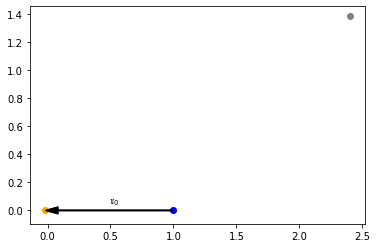

In [26]:
import matplotlib.pyplot as plt
import numpy as np

earth_semimajor_axis = 1.  # au
earth_eccentricity = 0.0167086
focal_length = earth_eccentricity * earth_semimajor_axis
#Sun location
sun_x, sun_y = -focal_length, 0.
plt.scatter(sun_x, sun_y, color='orange')
#Earth location
earth_x, earth_y = earth_semimajor_axis, 0.
plt.scatter(earth_x, earth_y, color='blue')
#2 Pallas location
angle = np.pi/6
pallas_semimajor_axis = 2.771
pallas_x = pallas_semimajor_axis*np.cos(angle)
pallas_y = pallas_semimajor_axis*np.sin(angle)
plt.scatter(pallas_x, pallas_y,
            color='gray')

# Geocentric position of Sun
arrow_width = 0.005
plt.arrow(earth_semimajor_axis, 0,
          -(earth_semimajor_axis+focal_length), 0,
          color='black', width=arrow_width,
          length_includes_head=True,
          head_width=10*arrow_width, head_length=20*arrow_width)
sun_position_label=r'$\mathfrak{r}_0$'
plt.text(0.5*(earth_x+sun_x), 0.05,
         sun_position_label)

# Geocentric position of 2 Pallas
plt.arrow(earth_semimajor_axis, 0,
          -(earth_semimajor_axis+focal_length), 0,
          color='black', width=arrow_width,
          length_includes_head=True,
          head_width=10*arrow_width, head_length=20*arrow_width)

plt.show()



$\mathfrak{x}_0, \mathfrak{y}_0, \mathfrak{z}_0 = $ geocentric equatorial coordinates of the Sun

Values taken from Chapter 13.6 of Celestial Mechanics (Tatum)

In [9]:
from astropy.time import Time
import numpy as np

times = ['2002-07-10', '2002-07-15', '2002-07-25']
time_objects = []
for time in times:
    time_objects.append(Time(time+'T00:00:00', format='isot', scale='utc'))

# Values of angular coordinates in radians
right_ascensions = [5.5649, 5.5521, 5.5222]
declinations = [0.2833, 0.2803, 0.2690]

# Convert δ, α to l, m, n
def convert_equatorial_coordinates_to_cartesian_angles(declination, right_ascension):
    l = np.cos(declination) * np.cos(right_ascension)
    m = np.cos(declination) * np.sin(right_ascension)
    n = np.sin(declination)
    return l,m,n

geocentric_cartesian_angle_factors = []
for right_ascension, declination in zip(right_ascensions, declinations):
    geocentric_cartesian_angle_factors.append(convert_equatorial_coordinates_to_cartesian_angles(declination,
        right_ascension))

## Describe crude approximation equations
\begin{align*}
l_1 a_1 \Delta_1 - l_2 \Delta_2 +l_3 a_3 \Delta_3 &= a_1 \mathfrak{x}_{01} -\mathfrak{x}_{02} + a_3 \mathfrak{x}_{03}\\
m_1 a_1 \Delta_1 - m_2 \Delta_2 +m_3 a_3 \Delta_3 &= a_1 \mathfrak{y}_{01} -\mathfrak{y}_{02} + a_3 \mathfrak{y}_{03}\\
n_1 a_1 \Delta_1 - n_2 \Delta_2 +n_3 a_3 \Delta_3 &= a_1 \mathfrak{z}_{01} -\mathfrak{z}_{02} + a_3 \mathfrak{z}_{03}\\
\end{align*}

In [10]:
def crude_approximation_geocentric(observation_times, geocentric_angles):
    from astropy.coordinates import get_sun
    earth_sun_separations = []
    for time in observation_times:
        earth_sun_separation = get_sun(time)
        earth_sun_separation.representation_type = 'cartesian'
        earth_sun_separations.append([earth_sun_separation.x.value, earth_sun_separation.y.value,
                                      earth_sun_separation.z.value])

    a1 = 2/3
    a3 = 1/3
    geocentric_distance_coefficients = np.zeros((3, 3))

    geocentric_distance_coefficients[:, 0] = a1 * geocentric_angles[0]
    geocentric_distance_coefficients[:, 1] = -1 * geocentric_angles[1]
    geocentric_distance_coefficients[:, 2] = a3 * geocentric_angles[2]

    earth_sun_separations = np.array(earth_sun_separations)
    earth_sun_separation_coefficients = a1 * earth_sun_separations[0]
    earth_sun_separation_coefficients += -1 * earth_sun_separations[1]
    earth_sun_separation_coefficients += a3 * earth_sun_separations[2]
    geocentric_distances = np.linalg.solve(geocentric_distance_coefficients, earth_sun_separation_coefficients)

    return geocentric_distances

geocentric_cartesian_angle_factors = np.array(geocentric_cartesian_angle_factors)
geocentric_distances = crude_approximation_geocentric(time_objects, geocentric_cartesian_angle_factors)
print('{} AU'.format(geocentric_distances))

[2.78205595 2.72660797 2.63307984] AU
[2.78205595 2.72660797 2.63307984] AU
